In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve

In [7]:
!pip install xlrd

In [8]:
data=pd.read_excel('titanic3.xls')

In [9]:
data.head(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


In [10]:
data.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [11]:
data=data[['pclass','survived','sex','age']]
data.head()

,pclass,survived,sex,age
0,1,1,female,29.0000
1,1,1,male,0.9167
2,1,0,female,2.0000
3,1,0,male,30.0000
4,1,0,female,25.0000


In [12]:
data.describe()

,pclass,survived,age
count,1309.000000,1309.000000,1046.000000
mean,2.294882,0.381971,29.881135
std,0.837836,0.486055,14.413500
min,1.000000,0.000000,0.166700
25%,2.000000,0.000000,21.000000
50%,3.000000,0.000000,28.000000
75%,3.000000,1.000000,39.000000
max,3.000000,1.000000,80.000000


In [13]:
data=data.dropna(axis=0)
data['age']=data['age'].astype(int)

In [14]:
data.head()

,pclass,survived,sex,age
0,1,1,female,29
1,1,1,male,0
2,1,0,female,2
3,1,0,male,30
4,1,0,female,25


In [15]:
data['sex']=data['sex'].map({'female':1,'male':0},na_action=None)

In [16]:
data.head()

,pclass,survived,sex,age
0,1,1,1,29
1,1,1,0,0
2,1,0,1,2
3,1,0,0,30
4,1,0,1,25


In [17]:
data.describe()

,pclass,survived,sex,age
count,1046.000000,1046.000000,1046.000000,1046.000000
mean,2.207457,0.408222,0.370937,29.857553
std,0.841497,0.491740,0.483287,14.426974
min,1.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,21.000000
50%,2.000000,0.000000,0.000000,28.000000
75%,3.000000,1.000000,1.000000,39.000000
max,3.000000,1.000000,1.000000,80.000000


In [18]:
#Now our dataset is clean and numeric

In [19]:
y=data['survived']
x=data.drop('survived',axis=1)

In [20]:
x.head()

,pclass,sex,age
0,1,1,29
1,1,0,0
2,1,1,2
3,1,0,30
4,1,1,25


In [21]:
y.head()

0    1
1    1
2    0
3    0
4    0
Name: survived, dtype: int64

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.4)

In [23]:
model=KNeighborsClassifier()
model.fit(x_train,y_train)

KNeighborsClassifier()

In [24]:
pred=model.predict(x_test)
model.score(x_test,y_test)

0.7255369928400954

In [25]:
#We are going  to search the good parameters for model in order to have a good score
param_grid={'n_neighbors':np.arange(1,50),'metric':['euclidean', 'manhattan']}
Grid=GridSearchCV(KNeighborsClassifier(),param_grid,cv=10)

In [26]:
Grid.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [27]:
Grid.best_params_

{'metric': 'manhattan', 'n_neighbors': 4}

In [28]:
model=Grid.best_estimator_

In [29]:
model.score(x_test,y_test)

0.7231503579952268

In [30]:
confusion_matrix(y_test,model.predict(x_test))

array([[215,  26],
       [ 90,  88]])

In [31]:
N,train_score,val_score=learning_curve(model,x_train,y_train,train_sizes=np.linspace(0.1,1.0,10),cv=10)
print(N)

[ 56 112 169 225 282 338 394 451 507 564]


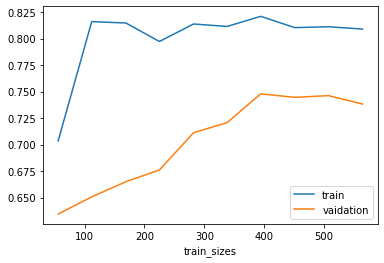

In [32]:
plt.plot(N,train_score.mean(axis=1),label='train')
plt.plot(N,val_score.mean(axis=1),label='vaidation')
plt.xlabel('train_sizes')
plt.legend()